<a href="https://colab.research.google.com/github/SAKSHIDHYANI/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project 2/SeoulBikeData.csv",encoding= 'unicode_escape')

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.shape

(8760, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#column names
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# No Null Values
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
data['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
data.replace({'Holiday':{'No Holiday':0,'Holiday':1},'Seasons':{'Summer':3,'Spring':2,'Autumn':1,'Winter':0},'Functioning Day':{'Yes':1,'No':0}},inplace=True)


In [ ]:
data['Date']=pd.to_datetime(data['Date'],format="%d/%m/%Y")
data['weekday'] = data['Date'].dt.dayofweek
data['month'] = data['Date'].dt.month

In [ ]:
data.drop(columns='Date',inplace = True)

In [ ]:
data.head(15)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,month
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,1,4,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,1,4,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,1,4,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,1,4,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,1,4,12
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,0,1,4,12
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,0,1,4,12
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,1,4,12
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,1,4,12
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,0,1,4,12


**Finding Relationship of dependent variable with other independent variables**

In [ ]:
def relationship(column_name):
  plot_df = data.groupby([column_name])['Rented Bike Count'].aggregate(np.mean)
  plot_df = plot_df.reset_index()
  plt.scatter(plot_df[column_name], plot_df['Rented Bike Count'], alpha=0.5)
  plt.xlabel("Average wise - "+column_name)
  plt.ylabel('Rented Bike Count')
  plt.figure(figsize=(4,5))
  sns.distplot(data[column_name])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


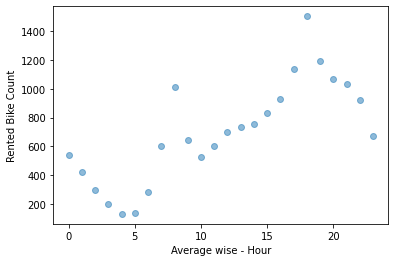

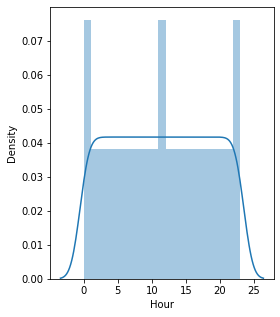

In [ ]:
relationship('Hour')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


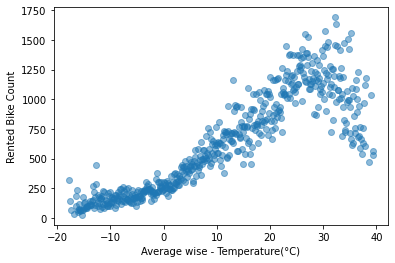

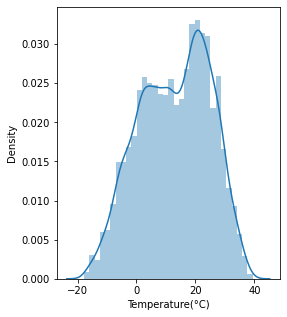

In [ ]:
relationship('Temperature(°C)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


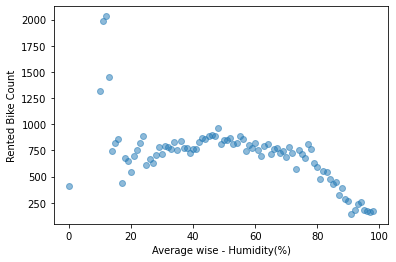

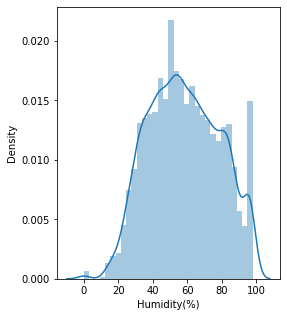

In [ ]:
relationship('Humidity(%)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


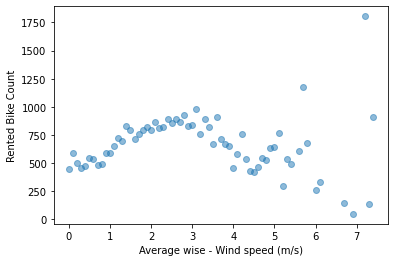

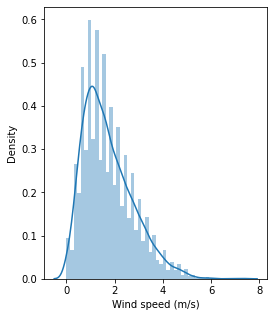

In [ ]:

relationship('Wind speed (m/s)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


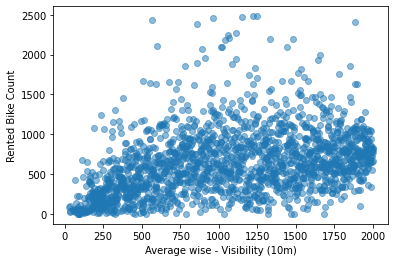

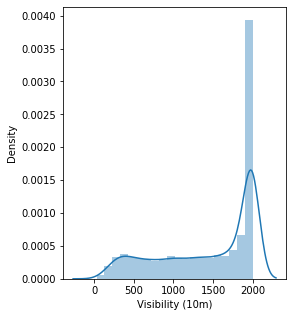

In [ ]:
relationship('Visibility (10m)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


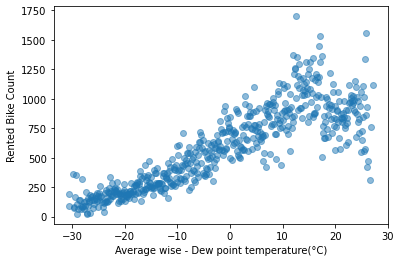

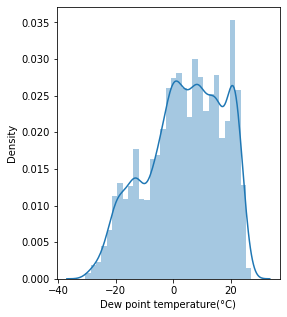

In [ ]:
relationship('Dew point temperature(°C)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


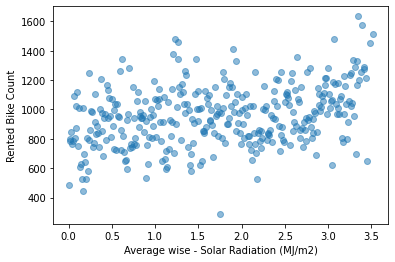

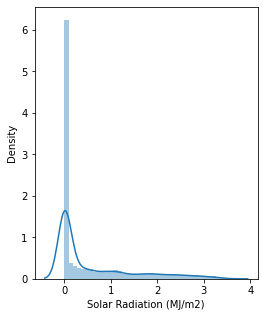

In [ ]:
relationship('Solar Radiation (MJ/m2)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


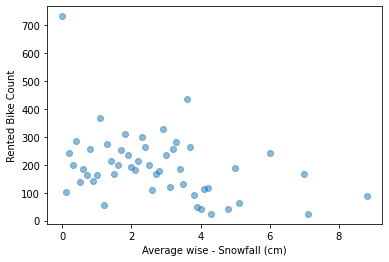

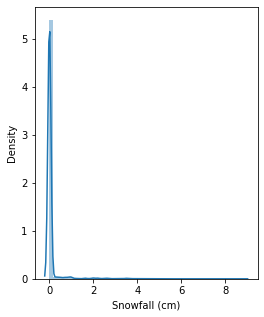

In [ ]:
relationship('Snowfall (cm)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


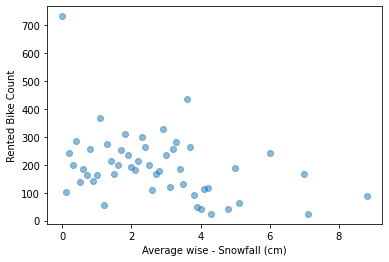

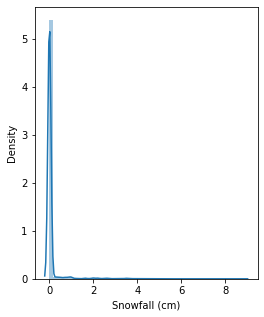

In [ ]:
relationship('Snowfall (cm)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


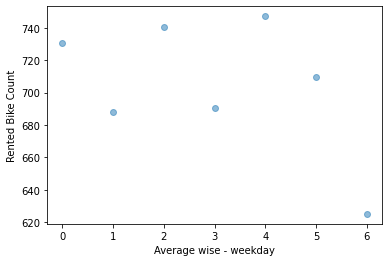

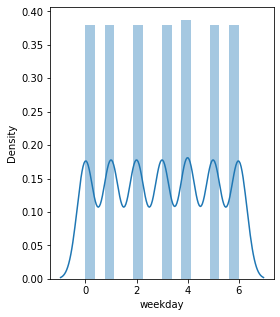

In [ ]:
relationship('weekday')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


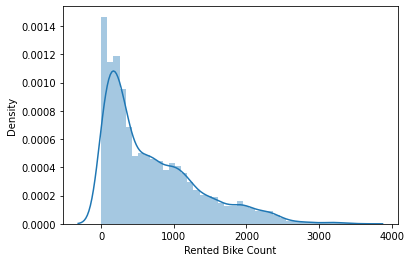

In [ ]:
 sns.distplot(data['Rented Bike Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


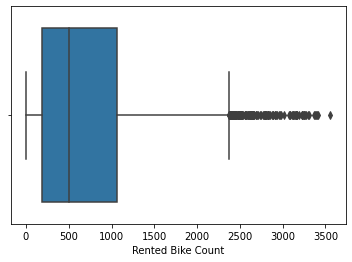

In [ ]:
sns.boxplot(data['Rented Bike Count'])

In [ ]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'weekday', 'month'],
      dtype='object')

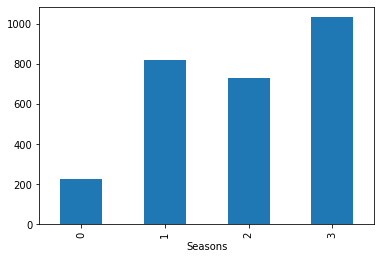

In [ ]:
data.groupby(['Seasons'])['Rented Bike Count'].mean().plot(kind="bar")

**Maximum rental bike count is for Summer Season**

Rental Bike Count for days on which there is a holiday: 215895
Rental Bike Count for days on which there is no holiday: 5956419


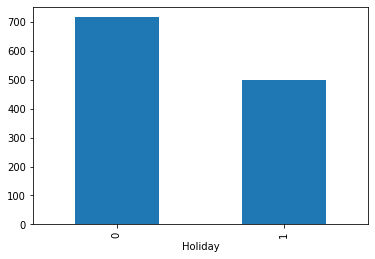

In [ ]:
print("Rental Bike Count for days on which there is a holiday:",data[data['Holiday'] == 1]['Rented Bike Count'].sum())
print("Rental Bike Count for days on which there is no holiday:",data[data['Holiday'] == 0]['Rented Bike Count'].sum())
data.groupby(['Holiday'])['Rented Bike Count'].mean().plot(kind="bar")

**Maximum rental bike count is for days when there is no holiday**

 Total Rental Bike count for Monday:  911743
 Total Rental Bike count for Tuesday:  858596
 Total Rental Bike count for Wednesday:  923956
 Total Rental Bike count for Thursday:  861999
 Total Rental Bike count for Friday:  950334
 Total Rental Bike count for Saturday:  885492
 Total Rental Bike count for Sunday:  780194


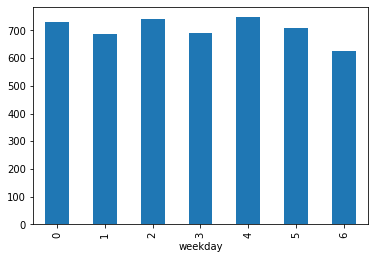

In [ ]:
print(" Total Rental Bike count for Monday: ",data[data['weekday'] == 0]['Rented Bike Count'].sum())
print(" Total Rental Bike count for Tuesday: ",data[data['weekday'] == 1]['Rented Bike Count'].sum())
print(" Total Rental Bike count for Wednesday: ",data[data['weekday'] == 2]['Rented Bike Count'].sum())
print(" Total Rental Bike count for Thursday: ",data[data['weekday'] == 3]['Rented Bike Count'].sum())
print(" Total Rental Bike count for Friday: ",data[data['weekday'] == 4]['Rented Bike Count'].sum())
print(" Total Rental Bike count for Saturday: ",data[data['weekday'] == 5]['Rented Bike Count'].sum())
print(" Total Rental Bike count for Sunday: ",data[data['weekday'] == 6]['Rented Bike Count'].sum())
data.groupby(['weekday'])['Rented Bike Count'].mean().plot(kind="bar")

**Rented Bike count for Friday, Wednesday, Monday are maximum and low for sundays. That means people opt for rental bikes when they go to school or work**

In [ ]:
independent_variables = ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month','weekday']

In [ ]:
dependent_variables =  ['Rented Bike Count']

In [ ]:
correlation_calc = data[independent_variables].corr()

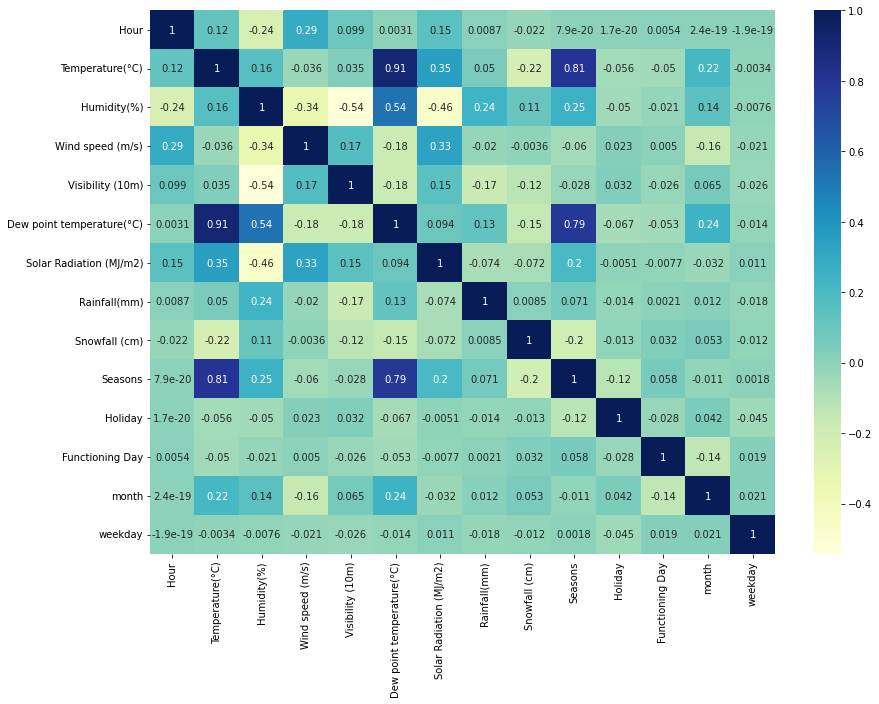

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

In [ ]:
# High correlation between Temperature and Dew Temperature,Temperature and Seasons so removing one of them
data.drop(columns='Dew point temperature(°C)',inplace =True)
data.drop(columns='Seasons',inplace =True)

In [ ]:
data.drop(columns="Humidity(%)",inplace=True)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekday,month
0,254,0,-5.2,2.2,2000,0.0,0.0,0.0,0,1,4,12
1,204,1,-5.5,0.8,2000,0.0,0.0,0.0,0,1,4,12
2,173,2,-6.0,1.0,2000,0.0,0.0,0.0,0,1,4,12
3,107,3,-6.2,0.9,2000,0.0,0.0,0.0,0,1,4,12
4,78,4,-6.0,2.3,2000,0.0,0.0,0.0,0,1,4,12


In [ ]:
pd.set_option('display.max_rows', None)
data['Day/Night/evening']=data['Hour'].apply(lambda x : 'night' if (x >=20 or x<5) else( 'Day'))


In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekday,month,Day/Night/evening
0,254,0,-5.2,2.2,2000,0.0,0.0,0.0,0,1,4,12,night
1,204,1,-5.5,0.8,2000,0.0,0.0,0.0,0,1,4,12,night
2,173,2,-6.0,1.0,2000,0.0,0.0,0.0,0,1,4,12,night
3,107,3,-6.2,0.9,2000,0.0,0.0,0.0,0,1,4,12,night
4,78,4,-6.0,2.3,2000,0.0,0.0,0.0,0,1,4,12,night


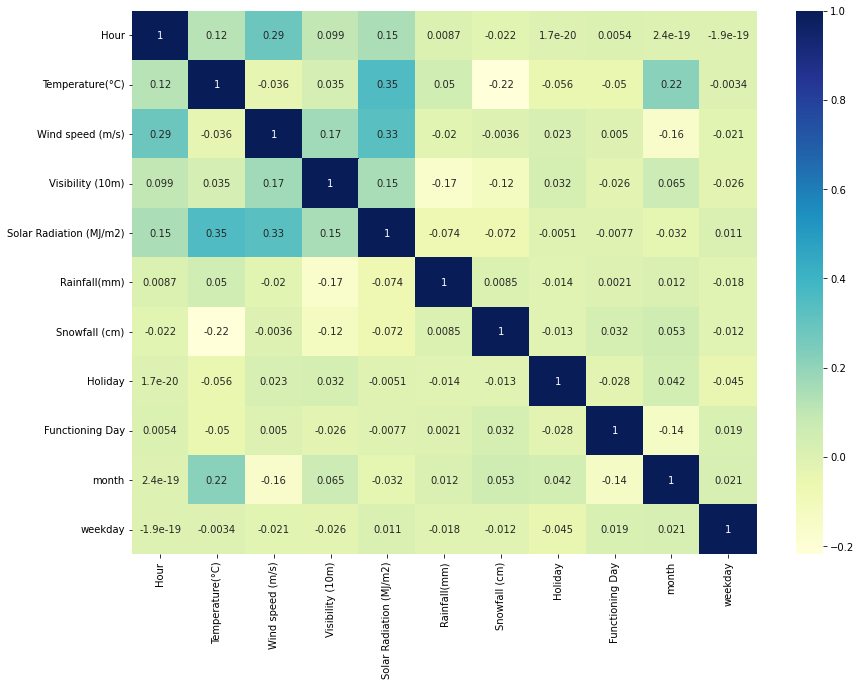

In [ ]:
independent_variables = ['Hour', 'Temperature(°C)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
       'Holiday', 'Functioning Day', 'month','weekday']
correlation_calc = data[independent_variables].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

In [ ]:
def regplot(col_name,i):
  sns.regplot(x = col_name, y = "Rented Bike Count", data = data,ax=axs[i], scatter_kws={"color": "grey"}, line_kws={"color": "red"})

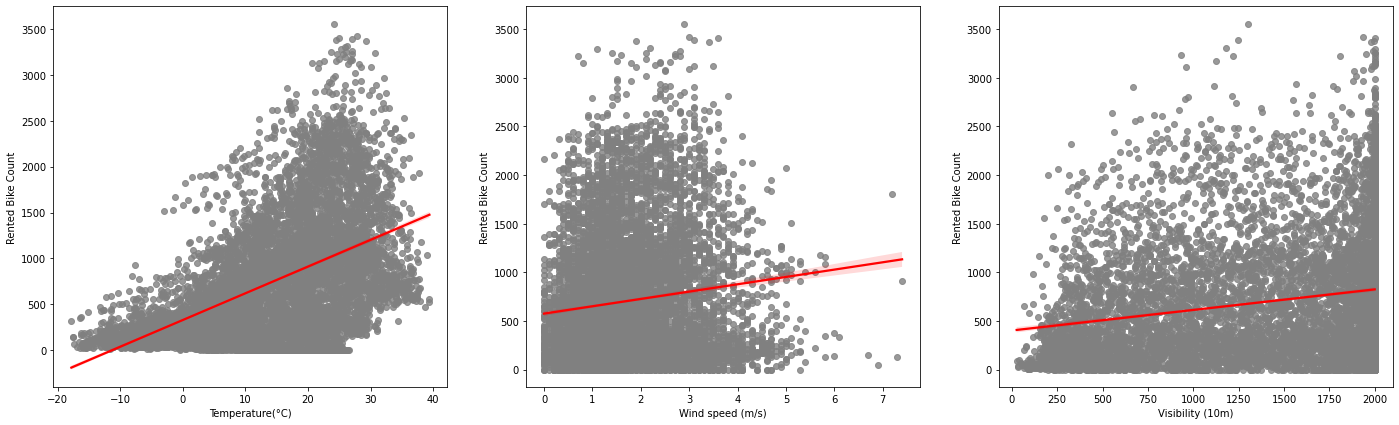

In [ ]:
fig, axs= plt.subplots(1,3,figsize=(24,7))
regplot('Temperature(°C)',0)
regplot('Wind speed (m/s)',1)
regplot('Visibility (10m)',2)


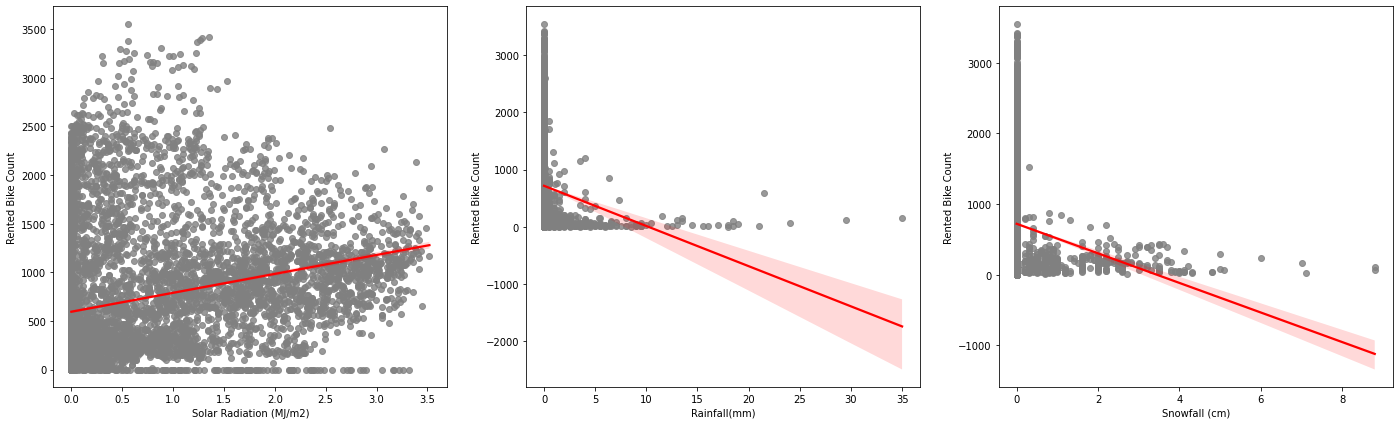

In [ ]:
fig, axs= plt.subplots(1,3,figsize=(24,7))
regplot('Solar Radiation (MJ/m2)',0)
regplot('Rainfall(mm)',1)
regplot('Snowfall (cm)',2)

In [ ]:
df1Corr=pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Functioning Day,0.203943
Visibility (10m),0.199280
month,0.133514
Wind speed (m/s),0.121108
weekday,-0.029357
Holiday,-0.072338
